### Step 1: Upload & Load Data
First, upload both CSV files (clients_data.csv and food_hampers_data.csv) to Colab.

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
# Load the clients dataset
clients_df = pd.read_csv('Copy_of_Clients_Data_Dimension.csv')

# Load the food hampers dataset
food_hampers_df = pd.read_csv('Copy_of_Food_Hampers_Fact.csv')


<ipython-input-2-fa39ebfc8b8e>:2: DtypeWarning: Columns (7,13) have mixed types. Specify dtype option on import or set low_memory=False.
  clients_df = pd.read_csv('Copy_of_Clients_Data_Dimension.csv')
<ipython-input-2-fa39ebfc8b8e>:5: DtypeWarning: Columns (11,30) have mixed types. Specify dtype option on import or set low_memory=False.
  food_hampers_df = pd.read_csv('Copy_of_Food_Hampers_Fact.csv')


Step 2: Remove Unnecessary Columns
We want to remove columns that don't contribute to the analysis (based on the project description).


In [ ]:
clients_df.drop(columns=[
    'address_complement','address_text', 'age', 'bio', 'birthdates',
    'client_status_more_info', 'external_id', 'emergency_contact_name', 'pets', 'picture',
    'organization_signature', 'primary_birthdate', 'primary_contact',
    'referral_organizations_allowed', 'worker', 'zz_address_txt', 'Slug',
    'Creator'], inplace=True)

In [ ]:
clients_df.head()

,address,communication_barrier,contact_frequency,date_reopened,dependents_qty,emergency_phone_number,english_proficiency_level,family,household,id_xano,...,preferred_contact_methods,preferred_languages,primary_client_key,sex,sex_new,status,status_update,urgent_goal,Creation Date,Modified Date
0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1695130222566x921238755334009700,yes,NaN,...,Phone Call,NaN,NaN,NaN,NaN,Active,NaN,no,"Sep 23, 2022 19:07","Aug 22, 2024 11:56"
1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1695130222165x975509409572786600,yes,NaN,...,NaN,NaN,NaN,NaN,NaN,Active,NaN,no,"Sep 23, 2022 19:09","Aug 22, 2024 11:50"
2,"11834 Kingsway NW, Edmonton, AB T5G 3J5, Canada",NaN,NaN,NaN,1.0,NaN,NaN,1695130222573x705934639754824700,yes,NaN,...,NaN,"English , Arabic",NaN,Male,Male,Active,NaN,no,"Nov 1, 2022 15:27","Aug 22, 2024 12:36"
3,"17916 78 St NW, Edmonton, AB T5Z 0G5, Canada",NaN,NaN,NaN,1.0,NaN,NaN,1695130222576x869045850202626800,yes,NaN,...,NaN,English,NaN,Female,Female,Active,NaN,no,"Nov 7, 2022 12:12","Aug 22, 2024 11:58"
4,NaN,NaN,NaN,"Oct 4, 2023 17:20",1.0,NaN,NaN,1695130222585x474362207170463900,yes,NaN,...,NaN,NaN,NaN,Male,Male,Active,1696450812192x367068913511604100,no,"Nov 7, 2022 12:17","Aug 22, 2024 12:04"


In [ ]:
# we will check column data types
clients_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25505 entries, 0 to 25504
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   address                           7264 non-null   object 
 1   communication_barrier             1 non-null      object 
 2   contact_frequency                 202 non-null    object 
 3   date_reopened                     13135 non-null  object 
 4   dependents_qty                    20591 non-null  float64
 5   emergency_phone_number            0 non-null      float64
 6   english_proficiency_level         21 non-null     object 
 7   family                            25442 non-null  object 
 8   household                         13789 non-null  object 
 9   id_xano                           31 non-null     float64
 10  latest_contact_method             533 non-null    object 
 11  latest_language_code              527 non-null    object 
 12  orga

In [ ]:
# check the missing values
clients_df.isnull().sum()

,0
address,18241
communication_barrier,25504
contact_frequency,25303
date_reopened,12370
dependents_qty,4914
emergency_phone_number,25505
english_proficiency_level,25484
family,63
household,11716
id_xano,25474


In [ ]:
clients_df.columns

Index(['address', 'communication_barrier', 'contact_frequency',
       'date_reopened', 'dependents_qty', 'emergency_phone_number',
       'english_proficiency_level', 'family', 'household', 'id_xano',
       'latest_contact_method', 'latest_language_code', 'organization',
       'podio_created_on', 'preferred_contact_method-old-old',
       'preferred_contact_methods', 'preferred_languages',
       'primary_client_key', 'sex', 'sex_new', 'status', 'status_update',
       'urgent_goal', 'Creation Date', 'Modified Date', 'unique id'],
      dtype='object')

Step 4: Handle Missing Data
🔸 4.1 Identify Columns with Too Many Missing Values

In [ ]:
# Identify Columns with Too Many Missing Values
missing_percentage = clients_df.isnull().sum() / len(clients_df) * 100
print(missing_percentage.sort_values(ascending=False))  # See missing values as a percentage


emergency_phone_number              100.000000
preferred_contact_method-old-old    100.000000
communication_barrier                99.996079
english_proficiency_level            99.917663
id_xano                              99.878455
contact_frequency                    99.207998
latest_language_code                 97.933738
latest_contact_method                97.910214
preferred_contact_methods            94.691237
preferred_languages                  79.925505
address                              71.519310
date_reopened                        48.500294
household                            45.936091
status_update                        44.771613
primary_client_key                   29.935307
dependents_qty                       19.266810
podio_created_on                      8.880612
sex                                   5.728289
sex_new                               3.909037
family                                0.247010
organization                          0.000000
status       

 Fill Missing Values for Categorical Columns

In [ ]:
clients_df["communication_barrier"].fillna("Unknown", inplace=True)
clients_df["english_proficiency_level"].fillna("Unknown", inplace=True)
clients_df["preferred_languages"].fillna("Not Specified", inplace=True)


<ipython-input-8-4b40d459c3d6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clients_df["communication_barrier"].fillna("Unknown", inplace=True)
<ipython-input-8-4b40d459c3d6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

Fill Missing Values for Numerical Columns

In [ ]:
clients_df["dependents_qty"].fillna(0, inplace=True)  # Assume 0 if missing


<ipython-input-9-df26b1dd4b5b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clients_df["dependents_qty"].fillna(0, inplace=True)  # Assume 0 if missing


Step 5: Standardize Data Types
🔸 5.1 Convert Date Columns to Datetime Format

In [ ]:
clients_df["Creation Date"] = pd.to_datetime(clients_df["Creation Date"], errors="coerce")
clients_df["Modified Date"] = pd.to_datetime(clients_df["Modified Date"], errors="coerce")


Step 6: Check & Remove Duplicates

In [ ]:
clients_df.duplicated().sum()  # Count duplicates
clients_df.drop_duplicates(inplace=True)  # Remove duplicates


In [ ]:
clients_df.shape

(25505, 26)

Step 2: Load and Inspect the food hampers Data

In [ ]:
food_hampers_df.head()  # Preview first few rows



,agent_collect,agent_collect_note,agent_related,appointment_contact,appointment_participants,appointment_type,cal_color,client_collected,client_list,collect_scheduled_date,...,staff_invited,timezone,title,unique_client,where,Creation Date,Modified Date,Slug,Creator,unique id
0,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,"Jul 27, 2023 00:00",...,NaN,NaN,New food hamper schedule,NaN,NaN,"Jul 27, 2023 15:57","Jul 27, 2023 15:57",NaN,1689771309517x402134288376915900,1690484251501x480105574053396160
1,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,"Aug 26, 2023 00:00",...,NaN,NaN,New food hamper schedule,NaN,NaN,"Jul 27, 2023 15:57","Jul 27, 2023 15:57",NaN,1689771309517x402134288376915900,1690484266053x272870528999898500
2,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,"Sep 25, 2023 00:00",...,NaN,NaN,New food hamper schedule,NaN,NaN,"Jul 27, 2023 15:57","Jul 27, 2023 15:57",NaN,1689771309517x402134288376915900,1690484268062x404921931938873500
3,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,"Oct 25, 2023 00:00",...,NaN,NaN,New food hamper schedule,NaN,NaN,"Jul 27, 2023 15:57","Jul 27, 2023 15:57",NaN,1689771309517x402134288376915900,1690484269673x683706627103465300
4,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,"Nov 24, 2023 00:00",...,NaN,NaN,New food hamper schedule,NaN,NaN,"Jul 27, 2023 15:57","Jul 27, 2023 15:57",NaN,1689771309517x402134288376915900,1690484271378x480307445517271800


In [ ]:
food_hampers_df.info()  # Check column types and missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16605 entries, 0 to 16604
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   agent_collect             7025 non-null   object 
 1   agent_collect_note        5566 non-null   object 
 2   agent_related             16605 non-null  object 
 3   appointment_contact       0 non-null      float64
 4   appointment_participants  12313 non-null  object 
 5   appointment_type          16605 non-null  object 
 6   cal_color                 7025 non-null   object 
 7   client_collected          8957 non-null   object 
 8   client_list               16486 non-null  object 
 9   collect_scheduled_date    16602 non-null  object 
 10  collect_token             16605 non-null  object 
 11  confirmed                 2915 non-null   object 
 12  contact_method            16605 non-null  object 
 13  datetime_from             16604 non-null  object 
 14  dateti

In [ ]:
food_hampers_df.isnull().sum()  # Check missing values

,0
agent_collect,9580
agent_collect_note,11039
agent_related,0
appointment_contact,16605
appointment_participants,4292
appointment_type,0
cal_color,9580
client_collected,7648
client_list,119
collect_scheduled_date,3


In [ ]:
food_hampers_df.drop(columns=[
    "agent_collect_note", "g_event_id", "g_event_link", "meeting_link", "qrcode",
    "cal_color", "related_scheduler", "staff_invited", "Creator", "Slug"
], inplace=True)


 Step 4: Handle Missing Values
🔸 4.1 Check Missing Percentage

In [ ]:
missing_percentage = food_hampers_df.isnull().sum() / len(food_hampers_df) * 100
print(missing_percentage.sort_values(ascending=False))


appointment_contact         100.000000
where                       100.000000
timezone                     99.969889
details                      86.341463
id_xano                      82.505269
confirmed                    82.445047
agent_collect                57.693466
pickup_date                  57.693466
hamper_confirmation_type     57.693466
client_collected             46.058416
appointment_participants     25.847636
client_list                   0.716652
unique_client                 0.716652
datetime_to                   0.036134
collect_scheduled_date        0.018067
datetime_from                 0.006022
quantity                      0.000000
Modified Date                 0.000000
Creation Date                 0.000000
title                         0.000000
appointment_type              0.000000
collect_token                 0.000000
pickup_location               0.000000
contact_method                0.000000
organization                  0.000000
marked_off               

2 Drop Columns with Too Many Missing Values

In [ ]:
food_hampers_df.drop(columns=["agent_related"], inplace=True)  # Example if mostly missing


 4.3 Fill Missing Values
Categorical columns → Replace with "Unknown"
Datetime columns → Convert to datetime and fill missing dates with a default
Numeric columns → Fill with median or zero

In [ ]:
food_hampers_df["appointment_contact"].fillna("Unknown", inplace=True)
food_hampers_df["contact_method"].fillna("Not Provided", inplace=True)
food_hampers_df["pickup_location"].fillna("Unknown", inplace=True)

food_hampers_df["datetime_from"] = pd.to_datetime(food_hampers_df["datetime_from"], errors="coerce")
food_hampers_df["datetime_to"] = pd.to_datetime(food_hampers_df["datetime_to"], errors="coerce")
food_hampers_df["pickup_date"] = pd.to_datetime(food_hampers_df["pickup_date"], errors="coerce")

food_hampers_df["quantity"].fillna(food_hampers_df["quantity"].median(), inplace=True)


<ipython-input-19-803869ed3a13>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  food_hampers_df["appointment_contact"].fillna("Unknown", inplace=True)
<ipython-input-19-803869ed3a13>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  food_hampers_df["appointment_contact"].fillna("Unknown", inplace=True)
<ipython-input-19-803869ed3a13>:2: FutureWarn

#Standardize Data Types
Convert Categorical Variables

In [ ]:
food_hampers_df["appointment_type"] = food_hampers_df["appointment_type"].astype("category")
food_hampers_df["hamper_type"] = food_hampers_df["hamper_type"].astype("category")
food_hampers_df["organization"] = food_hampers_df["organization"].astype("category")


Convert Date Columns to Datetime

In [ ]:
food_hampers_df["Creation Date"] = pd.to_datetime(food_hampers_df["Creation Date"], errors="coerce")
food_hampers_df["Modified Date"] = pd.to_datetime(food_hampers_df["Modified Date"], errors="coerce")


#Remove Duplicates

In [ ]:
food_hampers_df.duplicated().sum()  # Check duplicate rows
food_hampers_df.drop_duplicates(inplace=True)  # Remove duplicates


##Merging datsets

In [ ]:
df_merged = food_hampers_df.merge(clients_df, left_on="unique_client", right_on="unique id", how="left")



In [ ]:
print(df_merged.info())
print(df_merged.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16605 entries, 0 to 16604
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   agent_collect                     7025 non-null   object        
 1   appointment_contact               16605 non-null  object        
 2   appointment_participants          12313 non-null  object        
 3   appointment_type                  16605 non-null  category      
 4   client_collected                  8957 non-null   object        
 5   client_list                       16486 non-null  object        
 6   collect_scheduled_date            16602 non-null  object        
 7   collect_token                     16605 non-null  object        
 8   confirmed                         2915 non-null   object        
 9   contact_method                    16605 non-null  object        
 10  datetime_from                     16604 non-nu

#Handle Duplicates and Missing Values

Check for Duplicates

In [ ]:
print(df_merged.duplicated().sum())  # Count duplicate rows
df_merged = df_merged.drop_duplicates()  # Remove duplicates


0


Check for Missing Values

In [ ]:
print(df_merged.isnull().sum().sort_values(ascending=False))  # View missing values per column


where                               16605
preferred_contact_method-old-old    16605
emergency_phone_number              16605
timezone                            16600
id_xano_y                           16566
primary_client_key                  16095
details                             14337
contact_frequency                   13984
id_xano_x                           13700
confirmed                           13690
date_reopened                       11956
status_update                       11658
agent_collect                        9580
pickup_date                          9580
hamper_confirmation_type             9580
latest_language_code                 8035
latest_contact_method                7931
client_collected                     7648
appointment_participants             4292
podio_created_on                     3356
sex                                  3267
preferred_contact_methods            2911
sex_new                              1613
address                           

In [ ]:
df_merged.to_csv("Merged_Food_Hampers_and_Clients.csv", index=False)



#Check for Missing Values

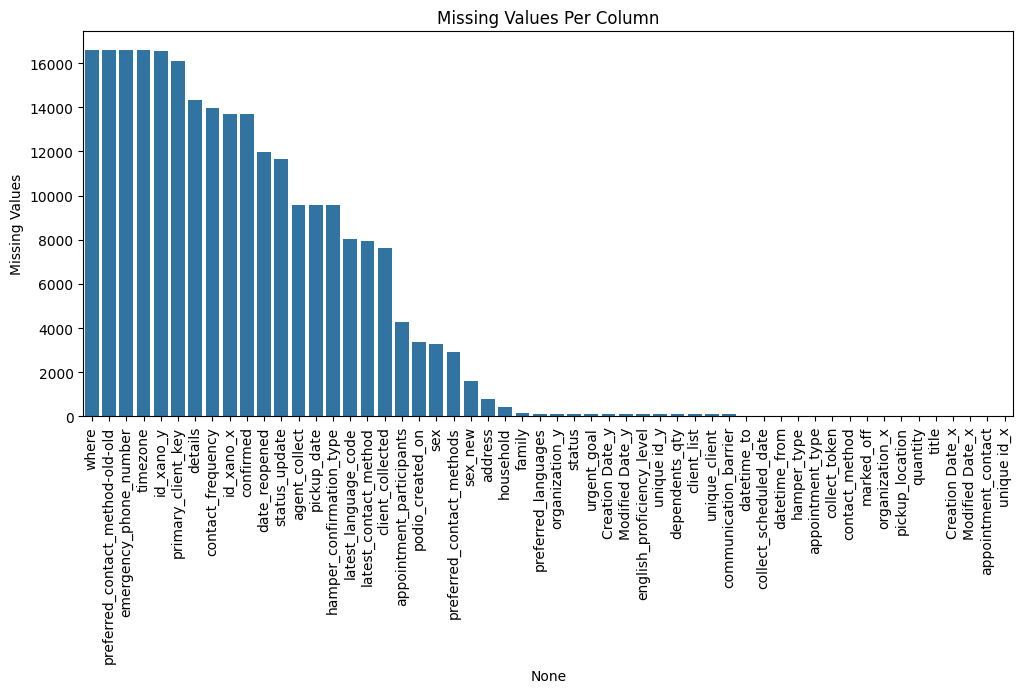

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Count missing values per column
missing_values = df_merged.isnull().sum().sort_values(ascending=False)

# Plot missing values
plt.figure(figsize=(12, 5))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.ylabel("Missing Values")
plt.title("Missing Values Per Column")
plt.show()


Check for Duplicates

In [ ]:
# Count duplicate rows
print("Duplicate Rows:", df_merged.duplicated().sum())

# Drop duplicates if necessary
df_merged = df_merged.drop_duplicates()


Duplicate Rows: 0


#Define "Delayed" Deliveries
Create a 'Delayed' Column

Delayed
True     13690
False     2915
Name: count, dtype: int64


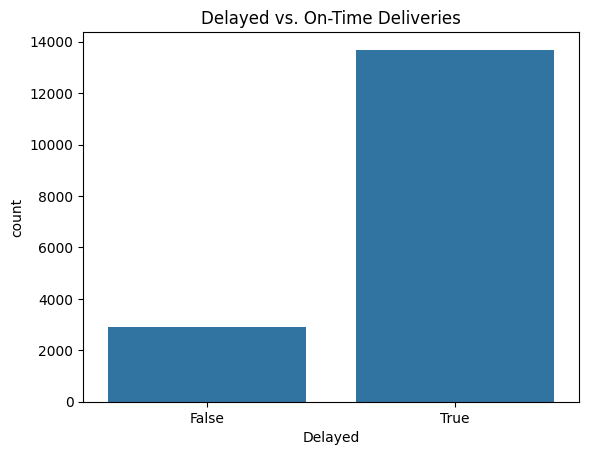

In [ ]:
# Convert dates to datetime format
df_merged["pickup_date"] = pd.to_datetime(df_merged["pickup_date"], errors="coerce")
df_merged["datetime_from"] = pd.to_datetime(df_merged["datetime_from"], errors="coerce")
df_merged["datetime_to"] = pd.to_datetime(df_merged["datetime_to"], errors="coerce")

# Define delay condition
df_merged["Delayed"] = (df_merged["datetime_to"] > df_merged["datetime_from"]) | (df_merged["confirmed"].isnull())

# Count delayed vs on-time deliveries
print(df_merged["Delayed"].value_counts())

# Plot delayed vs. on-time deliveries
sns.countplot(x=df_merged["Delayed"])
plt.title("Delayed vs. On-Time Deliveries")
plt.show()


#Identify Key Delay Factors

1. Time of Delivery

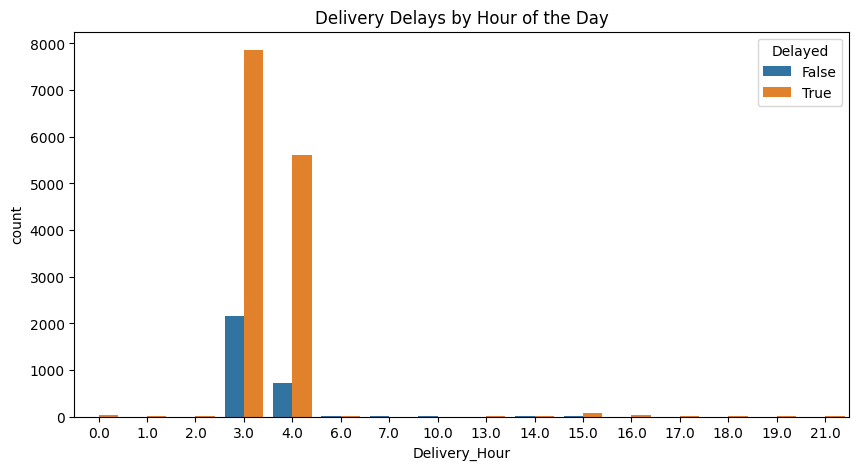

In [ ]:
# Extract hour of delivery
df_merged["Delivery_Hour"] = df_merged["datetime_from"].dt.hour

# Plot delay trends by hour
plt.figure(figsize=(10, 5))
sns.countplot(x="Delivery_Hour", hue="Delayed", data=df_merged)
plt.title("Delivery Delays by Hour of the Day")
plt.show()


2. Communication Barriers

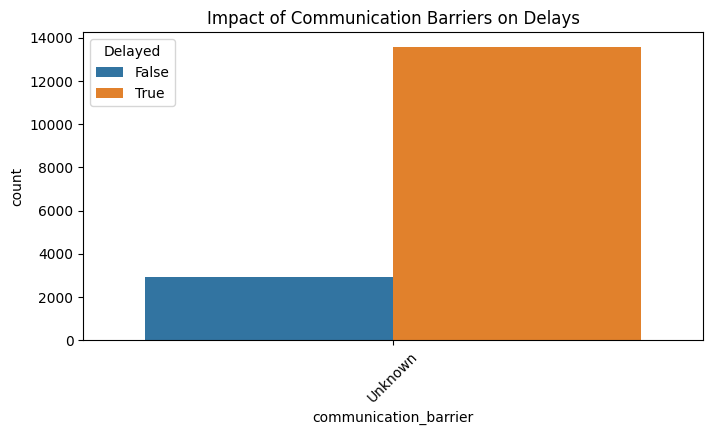

In [ ]:
# Check delay rate for communication barriers
plt.figure(figsize=(8, 4))
sns.countplot(x="communication_barrier", hue="Delayed", data=df_merged)
plt.title("Impact of Communication Barriers on Delays")
plt.xticks(rotation=45)
plt.show()


3.  Number of Dependents

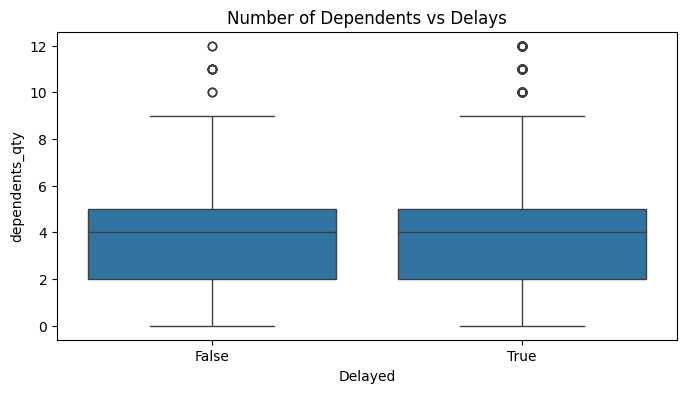

In [ ]:
# Compare dependents vs delays
plt.figure(figsize=(8, 4))
sns.boxplot(x="Delayed", y="dependents_qty", data=df_merged)
plt.title("Number of Dependents vs Delays")
plt.show()


4. Preferred Contact Method

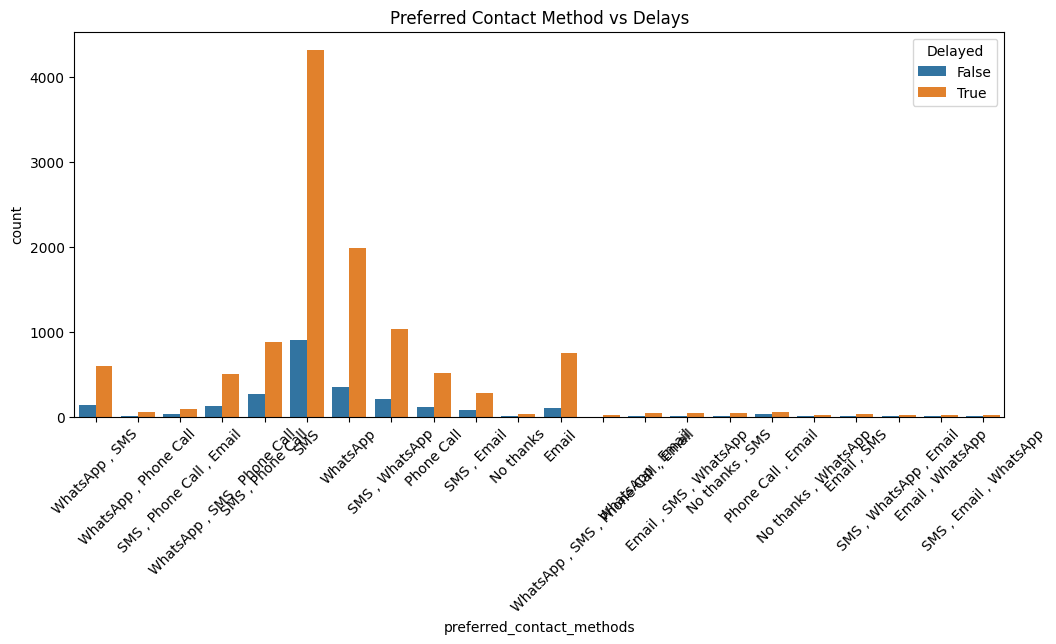

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(x="preferred_contact_methods", hue="Delayed", data=df_merged)
plt.title("Preferred Contact Method vs Delays")
plt.xticks(rotation=45)
plt.show()


5. Organization Impact

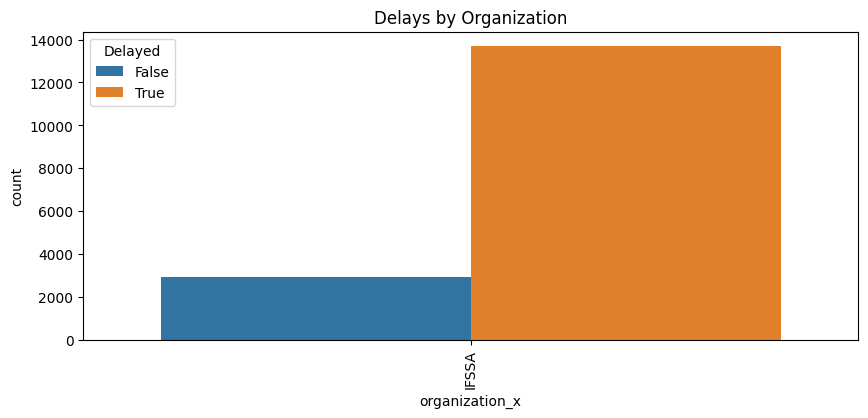

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(x="organization_x", hue="Delayed", data=df_merged)
plt.title("Delays by Organization")
plt.xticks(rotation=90)
plt.show()


6.Urgent Goal & Delays

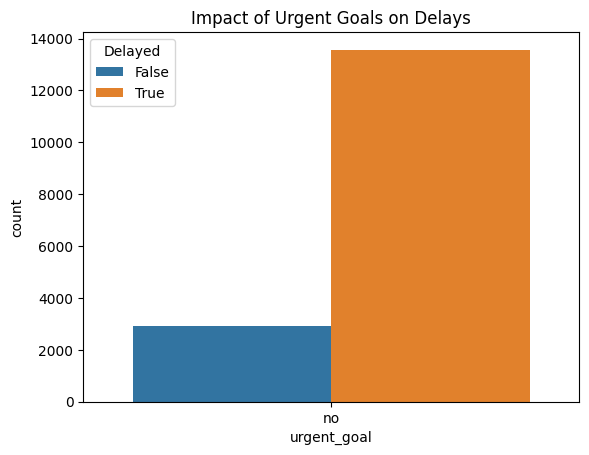

In [ ]:
sns.countplot(x="urgent_goal", hue="Delayed", data=df_merged)
plt.title("Impact of Urgent Goals on Delays")
plt.show()


#Correlation Analysis

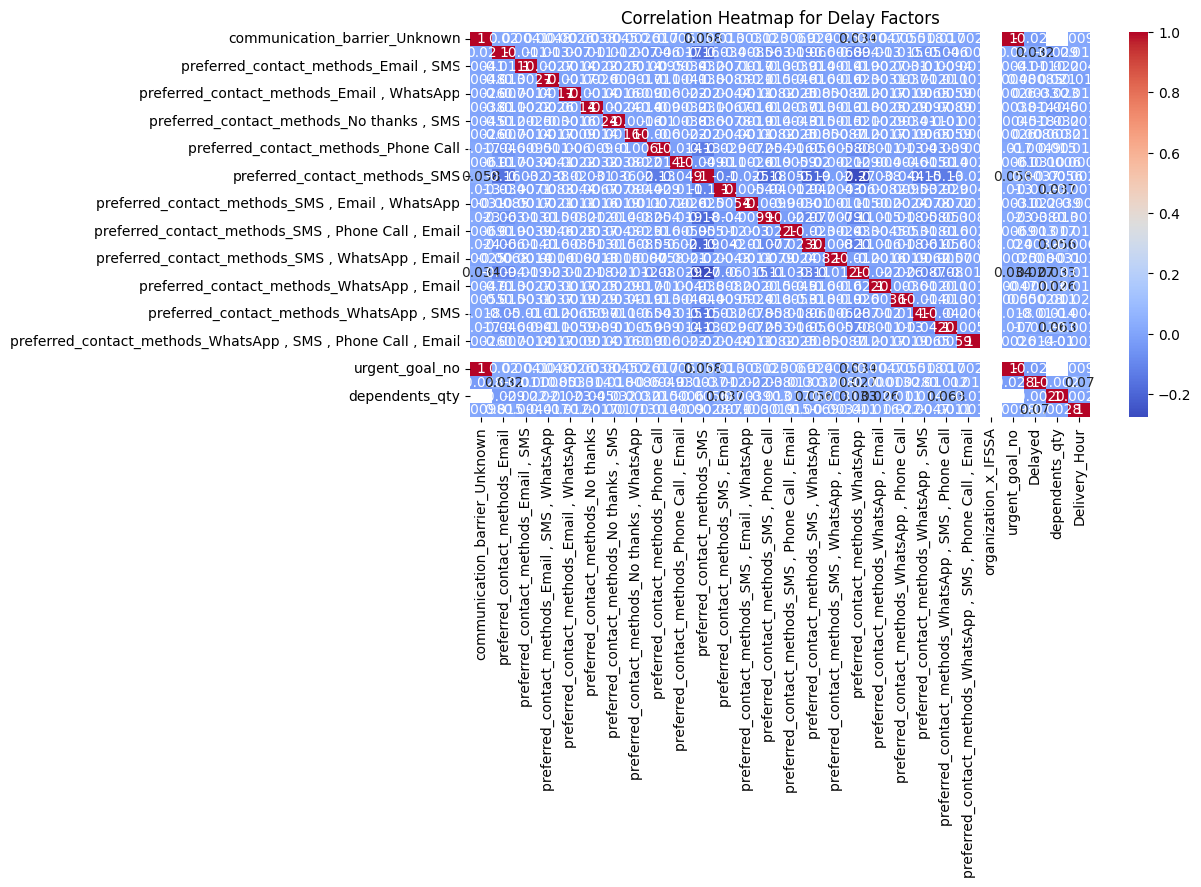

In [ ]:
# Convert categorical data into numerical for correlation
df_encoded = pd.get_dummies(df_merged[["communication_barrier", "preferred_contact_methods", "organization_x", "urgent_goal"]])

# Add numerical columns
df_encoded["Delayed"] = df_merged["Delayed"].astype(int)
df_encoded["dependents_qty"] = df_merged["dependents_qty"]
df_encoded["Delivery_Hour"] = df_merged["Delivery_Hour"]

# Compute correlation
plt.figure(figsize=(10, 5))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Delay Factors")
plt.show()
